In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import shapiro 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [3]:
raw_data = pd.read_csv('diabetes.csv')

raw_data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
742,1,109,58,18,116,28.5,0.219,22,0
91,4,123,80,15,176,32.0,0.443,34,0
44,7,159,64,0,0,27.4,0.294,40,0
90,1,80,55,0,0,19.1,0.258,21,0
298,14,100,78,25,184,36.6,0.412,46,1


### The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)^2).
7. Diabetes pedigree function.
8. Age (years).
9. Class variable (0 or 1).

Distribution chart for  Pregnancies


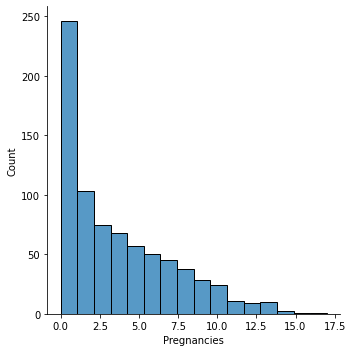

Based on Shapiro-Wilk test data for Pregnancies is NOT normally distributed.


Distribution chart for  Glucose


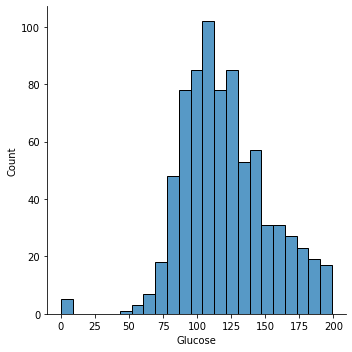

Based on Shapiro-Wilk test data for Glucose is NOT normally distributed.


Distribution chart for  BloodPressure


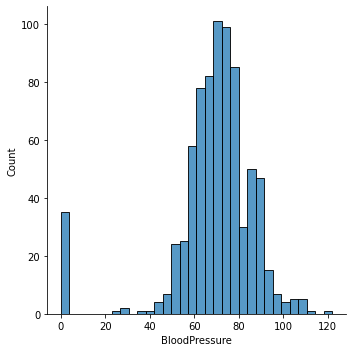

Based on Shapiro-Wilk test data for BloodPressure is NOT normally distributed.


Distribution chart for  SkinThickness


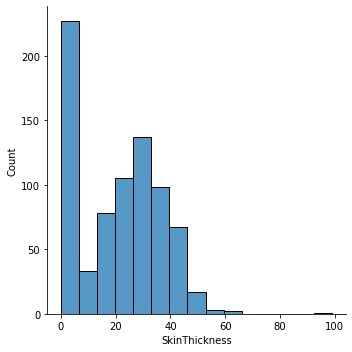

Based on Shapiro-Wilk test data for SkinThickness is NOT normally distributed.


Distribution chart for  Insulin


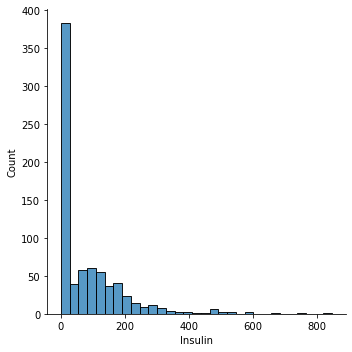

Based on Shapiro-Wilk test data for Insulin is NOT normally distributed.


Distribution chart for  BMI


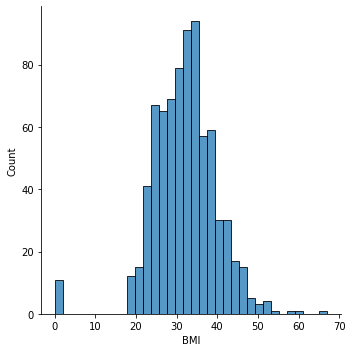

Based on Shapiro-Wilk test data for BMI is NOT normally distributed.


Distribution chart for  DiabetesPedigreeFunction


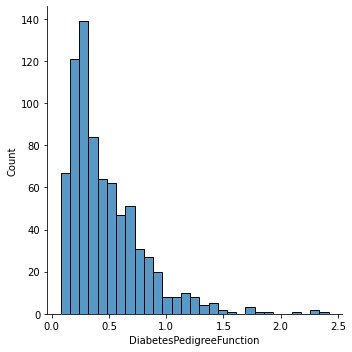

Based on Shapiro-Wilk test data for DiabetesPedigreeFunction is NOT normally distributed.


Distribution chart for  Age


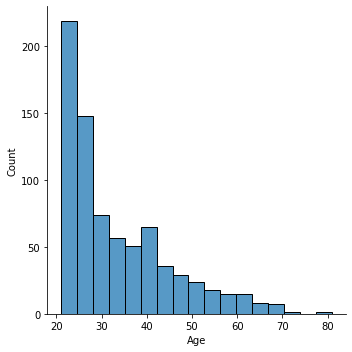

Based on Shapiro-Wilk test data for Age is NOT normally distributed.




In [4]:
for x in raw_data.drop('Outcome',axis=1).columns:
    print('Distribution chart for ',format(x))
#    print(shapiro(raw_data[(raw_data[x] != 0 )][x]))
    s_stats, s_p_value = shapiro(raw_data[(raw_data[x] != 0 )][x])
    sns.displot( data = raw_data, x=x)
    plt.show()
    if s_p_value >= 0.05:
        print('Based on Shapiro-Wilk test data for',x,'is normally distributed.\n\n')
    else:
        print('Based on Shapiro-Wilk test data for',x,'is NOT normally distributed.\n\n')

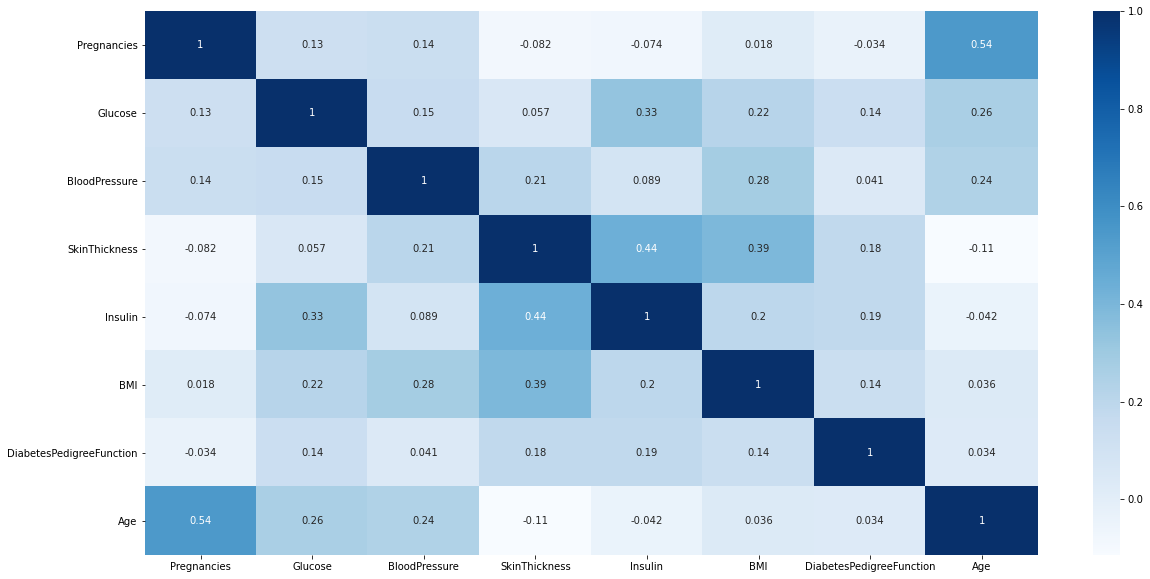

In [5]:
corr = raw_data.drop('Outcome',axis=1).corr(method='pearson')

fig, ax =  plt.subplots(figsize = (20,10))
ax = sns.heatmap(corr,cmap = 'Blues',fmt='.2g',annot=True)

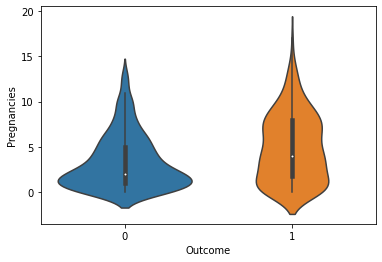

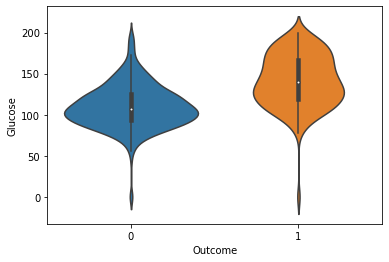

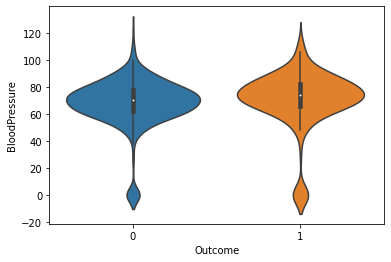

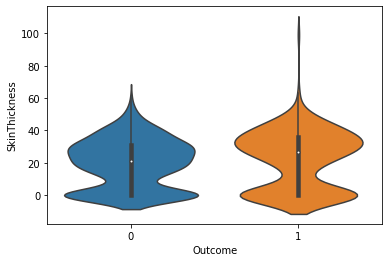

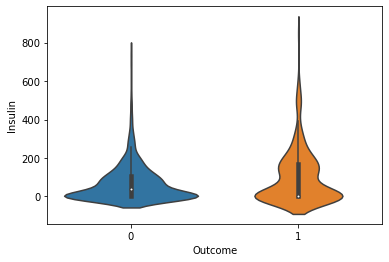

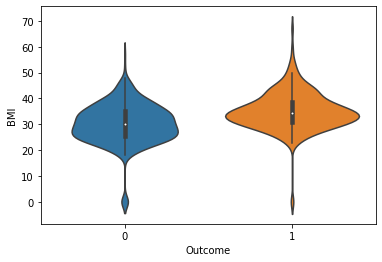

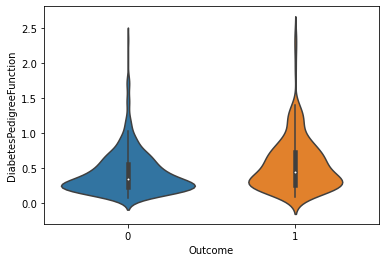

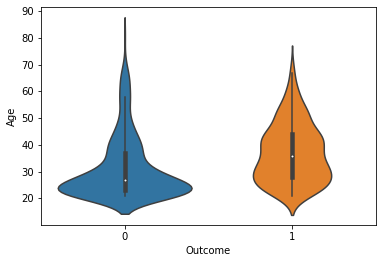

In [54]:
for x in raw_data.drop('Outcome',axis=1).columns:
    sns.violinplot(data = raw_data, x='Outcome', y=x)
    plt.show()

In [7]:
raw_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df1 = raw_data.loc[raw_data.Outcome == 1]
df0 = raw_data.loc[raw_data.Outcome == 0]

df1 = df1.replace({'Glucose':0},np.median(df1['Glucose']))
df0 = df0.replace({'Glucose':0},np.median(df0['Glucose']))

union = [df1,df0]
df = pd.concat(union)

df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

df1 = df1.replace({'BloodPressure':0},np.median(df1['BloodPressure']))
df0 = df0.replace({'BloodPressure':0},np.median(df0['BloodPressure']))

union = [df1,df0]
df = pd.concat(union)

df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

df1 = df1.replace({'BMI':0},np.median(df1['BMI']))
df0 = df0.replace({'BMI':0},np.median(df0['BMI']))

union = [df1,df0]
df = pd.concat(union)

df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

df1 = df1.replace({'DiabetesPedigreeFunction':0},np.median(df1['DiabetesPedigreeFunction']))
df0 = df0.replace({'DiabetesPedigreeFunction':0},np.median(df0['DiabetesPedigreeFunction']))

union = [df1,df0]
df = pd.concat(union)

In [55]:
for x in ['SkinThickness', 'Insulin']:
    df[x] = df[x].replace(0,np.nan)
    
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
310,6,80,66,30.0,NaN,26.2,0.313,41,0
755,1,128,88,39.0,110.0,36.5,1.057,37,1
8,2,197,70,45.0,543.0,30.5,0.158,53,1
424,8,151,78,32.0,210.0,42.9,0.516,36,1
34,10,122,78,31.0,NaN,27.6,0.512,45,0
734,2,105,75,NaN,NaN,23.3,0.560,53,0
539,3,129,92,49.0,155.0,36.4,0.968,32,1
53,8,176,90,34.0,300.0,33.7,0.467,58,1
351,4,137,84,NaN,NaN,31.2,0.252,30,0
745,12,100,84,33.0,105.0,30.0,0.488,46,0


In [10]:
imputer = KNNImputer(n_neighbors= 30)

df_knn30 = pd.DataFrame(imputer.fit_transform(df),columns =  df.columns)

In [11]:
imputer = KNNImputer(n_neighbors= 5)

df_knn5 = pd.DataFrame(imputer.fit_transform(df),columns =  df.columns)

In [12]:
df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

imputer = KNNImputer(n_neighbors= 30)

df1_knn30 = pd.DataFrame(imputer.fit_transform(df1),columns =  df.columns)
df0_knn30 = pd.DataFrame(imputer.fit_transform(df0),columns =  df.columns)

union = [df1_knn30,df0_knn30]
dfs_knn30 = pd.concat(union)

In [13]:
imputer = KNNImputer(n_neighbors= 5)

df1_knn5 = pd.DataFrame(imputer.fit_transform(df1),columns =  df.columns)
df0_knn5 = pd.DataFrame(imputer.fit_transform(df0),columns =  df.columns)

union = [df1_knn5,df0_knn5]
dfs_knn5 = pd.concat(union)

In [14]:
df_knn30

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,196.800000,33.6,0.627,50.0,1.0
1,8.0,183.0,64.0,29.966667,252.833333,23.3,0.672,32.0,1.0
2,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
3,3.0,78.0,50.0,32.000000,88.000000,31.0,0.248,26.0,1.0
4,2.0,197.0,70.0,45.000000,543.000000,30.5,0.158,53.0,1.0
...,...,...,...,...,...,...,...,...,...
763,9.0,89.0,62.0,20.666667,76.466667,22.5,0.142,33.0,0.0
764,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
765,2.0,122.0,70.0,27.000000,149.166667,36.8,0.340,27.0,0.0
766,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0


df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

df1 = df1.replace({'Insulin':0},np.mean(df1['Insulin']))
df0 = df0.replace({'Insulin':0},np.mean(df0['Insulin']))

union = [df1,df0]
df = pd.concat(union)

df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

df1 = df1.replace({'SkinThickness':0},np.mean(df1['SkinThickness']))
df0 = df0.replace({'SkinThickness':0},np.mean(df0['SkinThickness']))

union = [df1,df0]
df = pd.concat(union)

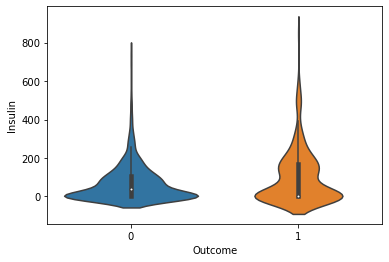

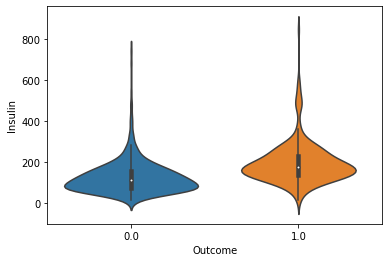

In [15]:
sns.violinplot(data = raw_data, x='Outcome', y = 'Insulin')
plt.show()
sns.violinplot(data = df_knn30, x='Outcome', y = 'Insulin')
plt.show()

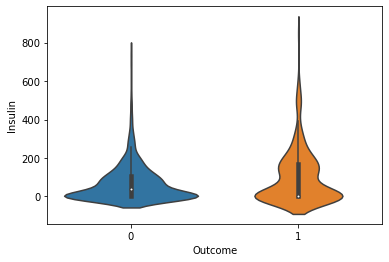

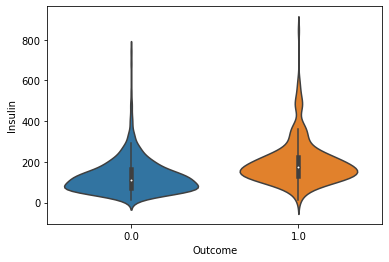

In [16]:
sns.violinplot(data = raw_data, x='Outcome', y = 'Insulin')
plt.show()
sns.violinplot(data = df_knn5, x='Outcome', y = 'Insulin')
plt.show()

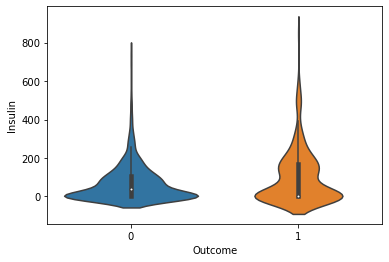

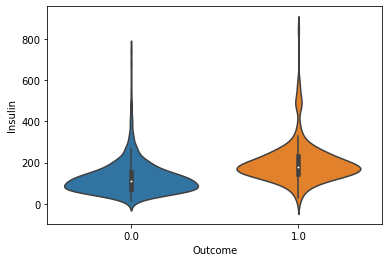

In [17]:
sns.violinplot(data = raw_data, x='Outcome', y = 'Insulin')
plt.show()
sns.violinplot(data = dfs_knn30, x='Outcome', y = 'Insulin')
plt.show()

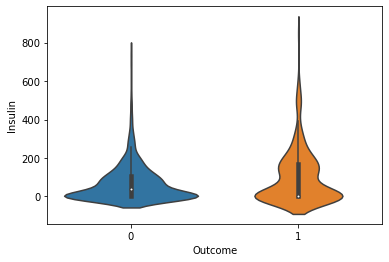

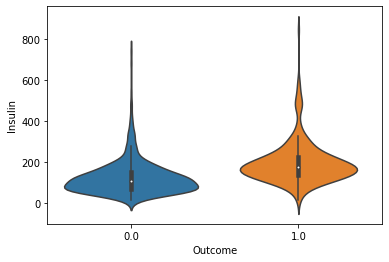

In [18]:
sns.violinplot(data = raw_data, x='Outcome', y = 'Insulin')
plt.show()
sns.violinplot(data = dfs_knn5, x='Outcome', y = 'Insulin')
plt.show()

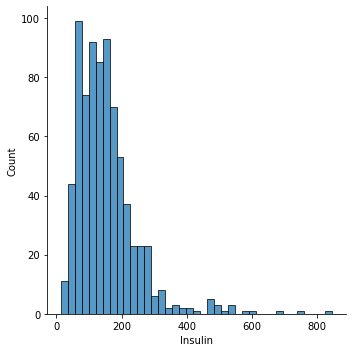

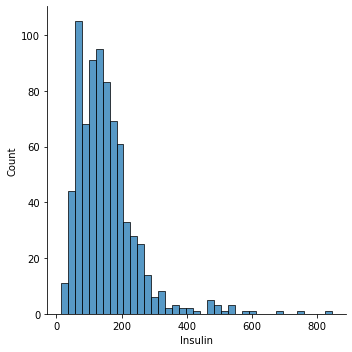

In [19]:
sns.displot(data=df_knn30, x = 'Insulin')
plt.show()

sns.displot(data=dfs_knn30, x = 'Insulin')
plt.show()

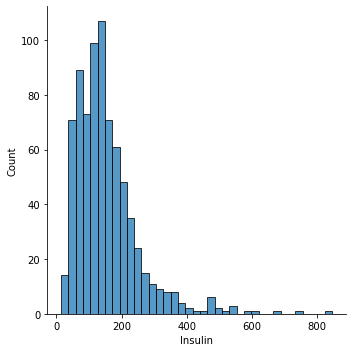

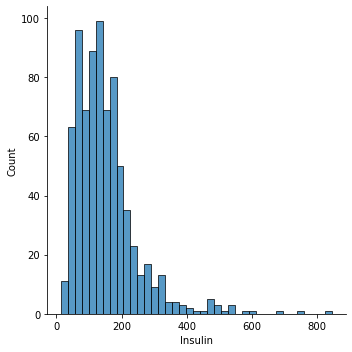

In [20]:
sns.displot(data=df_knn5, x = 'Insulin')
plt.show()

sns.displot(data=dfs_knn5, x = 'Insulin')
plt.show()

In [21]:
shapiro(dfs_knn5.Insulin)

ShapiroResult(statistic=0.827202558517456, pvalue=5.6230182509708605e-28)

In [22]:
shapiro(df_knn5.Insulin)

ShapiroResult(statistic=0.8372287750244141, pvalue=2.78166684099715e-27)

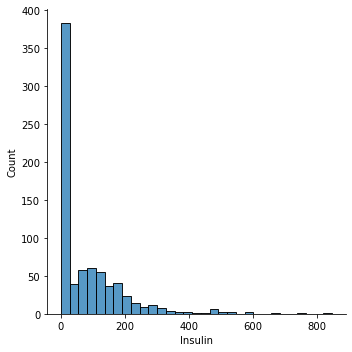

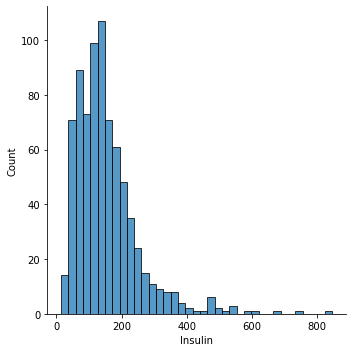

In [23]:
sns.displot(data=raw_data, x = 'Insulin')
plt.show()

sns.displot(data=df_knn5, x = 'Insulin')
plt.show()

In [24]:
df_val = pd.DataFrame()

for x in df.drop('Outcome',axis=1).columns:
    df_val[x]=raw_data[x].replace(0,np.nan)

In [25]:
(df_val.isnull().sum()/768)

Pregnancies                 0.144531
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64

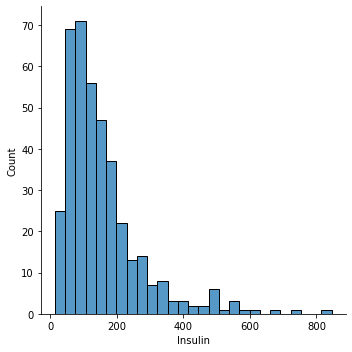

In [26]:
sns.displot( data = df, x='Insulin')

In [27]:
df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

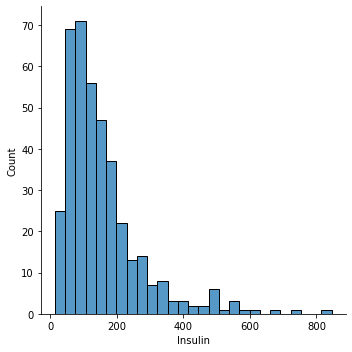

In [28]:
sns.displot( data = df, x='Insulin')

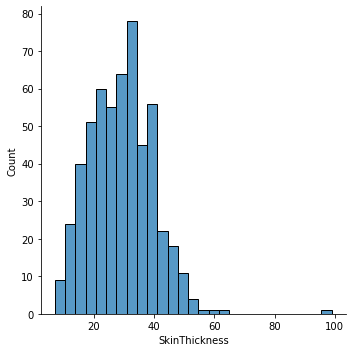

In [29]:
sns.displot( data = df, x='SkinThickness')

<AxesSubplot:>

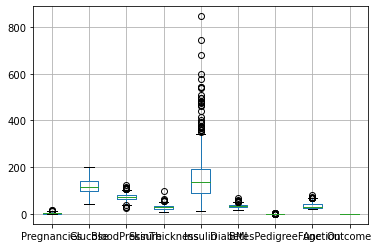

In [30]:
df_knn5.boxplot()

<AxesSubplot:>

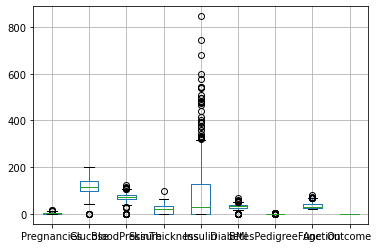

In [31]:
raw_data.boxplot()

In [32]:
X = dfs_knn5.drop({'Outcome'}, axis=1)

y = dfs_knn5.pop('Outcome')

In [33]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.40, random_state=1)

In [34]:
reg_dt_model_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,min_samples_split=30)

reg_dt_model_entropy.fit(X_train, train_labels)

train_char_labels = ['No','Yes']

dtree = open(r'./diabetes_entropy.dot','w')

dot_data = export_graphviz(reg_dt_model_entropy, out_file = dtree, feature_names = list(X_train), class_names = train_char_labels)

dtree.close()

In [35]:
reg_dt_model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=10,min_samples_split=30)

reg_dt_model_gini.fit(X_train, train_labels)

train_char_labels = ['No','Yes']

dtree = open(r'./diabetes_gini.dot','w')

dot_data = export_graphviz(reg_dt_model_gini, out_file = dtree, feature_names = list(X_train), class_names = train_char_labels)

dtree.close()

In [36]:
pd.DataFrame(reg_dt_model_entropy.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by='Imp',ascending = False)

,Imp
Insulin,0.392223
Glucose,0.174281
BMI,0.124627
DiabetesPedigreeFunction,0.096371
Age,0.084331
SkinThickness,0.055619
BloodPressure,0.037052
Pregnancies,0.035495


In [37]:
pd.DataFrame(reg_dt_model_entropy.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by='Imp',ascending = False)

,Imp
Insulin,0.392223
Glucose,0.174281
BMI,0.124627
DiabetesPedigreeFunction,0.096371
Age,0.084331
SkinThickness,0.055619
BloodPressure,0.037052
Pregnancies,0.035495


In [38]:
pd.DataFrame(reg_dt_model_entropy.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by='Imp',ascending = False)

,Imp
Insulin,0.392223
Glucose,0.174281
BMI,0.124627
DiabetesPedigreeFunction,0.096371
Age,0.084331
SkinThickness,0.055619
BloodPressure,0.037052
Pregnancies,0.035495


In [39]:
pd.DataFrame(reg_dt_model_gini.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by='Imp',ascending = False)

,Imp
Insulin,0.410236
Glucose,0.204236
Age,0.124175
BMI,0.123887
DiabetesPedigreeFunction,0.058707
SkinThickness,0.056045
Pregnancies,0.018430
BloodPressure,0.004284


In [40]:
pd.DataFrame(reg_dt_model_gini.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by='Imp',ascending = False)

,Imp
Insulin,0.410236
Glucose,0.204236
Age,0.124175
BMI,0.123887
DiabetesPedigreeFunction,0.058707
SkinThickness,0.056045
Pregnancies,0.018430
BloodPressure,0.004284


In [41]:
probs = reg_dt_model_entropy.predict_proba(X_train)[:,1]

auc_dev = roc_auc_score(train_labels, probs)

auc_dev

0.9478823335530653

In [42]:
probs = reg_dt_model_gini.predict_proba(X_train)[:,1]

auc_dev = roc_auc_score(train_labels, probs)

auc_dev

0.937695698747528

In [43]:
probs = reg_dt_model_entropy.predict_proba(X_train)[:,1]

auc_dev = roc_auc_score(train_labels, probs)

auc_dev

0.9478823335530653

In [44]:
probs = reg_dt_model_gini.predict_proba(X_train)[:,1]

auc_dev = roc_auc_score(train_labels, probs)

auc_dev

0.937695698747528

In [45]:
probs = reg_dt_model_entropy.predict_proba(X_train)[:,1]

auc_dev = roc_auc_score(train_labels, probs)

auc_dev

0.9478823335530653

In [46]:
probs = reg_dt_model_gini.predict_proba(X_train)[:,1]

auc_dev = roc_auc_score(train_labels, probs)

auc_dev

0.937695698747528

In [47]:
probs = reg_dt_model_entropy.predict_proba(X_train)[:,1]

auc_dev = roc_auc_score(train_labels, probs)

auc_dev

0.9478823335530653

In [48]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.10, random_state=1)

In [49]:
reg_dt_model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=10,min_samples_split=30,random_state=0)

reg_dt_model_gini.fit(X_train, train_labels)

train_char_labels = ['No','Yes']

dtree = open(r'./diabetes_gini.dot','w')

dot_data = export_graphviz(reg_dt_model_gini, out_file = dtree, feature_names = list(X_train), class_names = train_char_labels)

dtree.close()

In [67]:
pd.DataFrame(reg_dt_model_entropy.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by='Imp',ascending = False)

,Imp
Insulin,0.392223
Glucose,0.174281
BMI,0.124627
DiabetesPedigreeFunction,0.096371
Age,0.084331
SkinThickness,0.055619
BloodPressure,0.037052
Pregnancies,0.035495


0.9424636222201885


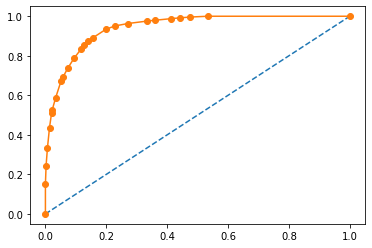

In [50]:
probs = reg_dt_model_gini.predict_proba(X_train)[:,1]
auc_dev = roc_auc_score(train_labels, probs)
print(auc_dev)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()

0.7278582930756843


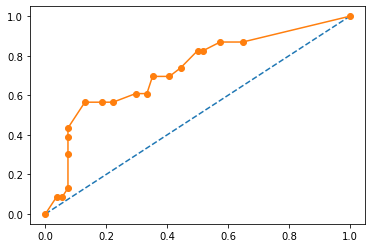

In [51]:
probt = reg_dt_model_gini.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(test_labels, probt)
print(auc_test)
fpr, tpr, thresholds = roc_curve(test_labels, probt)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()

0.8880316930775647


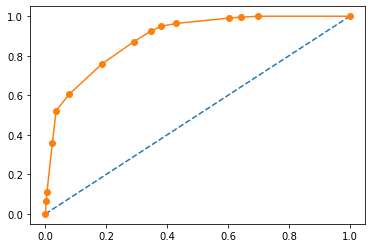

0.7914423076923077


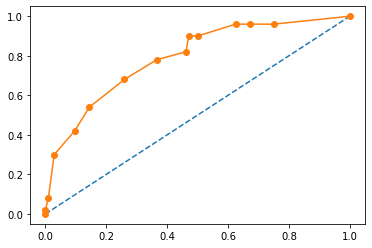

In [52]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.20, random_state=1)
reg_dt_model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=7,min_samples_split=80,random_state=0)
reg_dt_model_gini.fit(X_train, train_labels)

probs = reg_dt_model_gini.predict_proba(X_train)[:,1]
auc_dev = roc_auc_score(train_labels, probs)
print(auc_dev)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()

probt = reg_dt_model_gini.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(test_labels, probt)
print(auc_test)
fpr, tpr, thresholds = roc_curve(test_labels, probt)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()

In [53]:
ytrain_predict = reg_dt_model_gini.predict(X_train)
ytest_predict = reg_dt_model_gini.predict(X_test)

#Train data Confusion Matrix
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(reg_dt_model_gini.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))

#Test data Confusion Matrix
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(reg_dt_model_gini.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

[[365  31]
 [ 86 132]]
0.8094462540716613
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       396
         1.0       0.81      0.61      0.69       218

    accuracy                           0.81       614
   macro avg       0.81      0.76      0.78       614
weighted avg       0.81      0.81      0.80       614

[[89 15]
 [23 27]]
0.7532467532467533
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       104
         1.0       0.64      0.54      0.59        50

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.75      0.75      0.75       154

